# 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Loading dataset

In [2]:
df = pd.read_csv("student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3. Splitting data into train/test

In [3]:
np.random.seed(0)
X = df["Hours"].values
y = df["Scores"].values

scalerX = StandardScaler()
scalerY = StandardScaler()

X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

X = scalerX.fit_transform(X)
y = scalerY.fit_transform(y)

indices = np.arange(len(X))

(
    X_train, 
    X_test, 
    y_train, 
    y_test, 
    train_indices, 
    test_indices)= train_test_split(X, y, indices, test_size = 0.55, random_state = 70)

In [4]:
indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

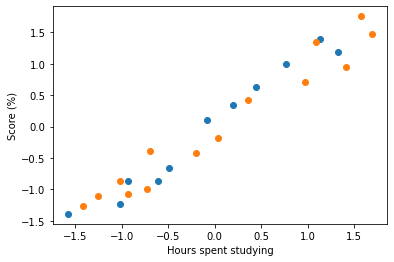

In [5]:
# df.plot.scatter(x="Hours", y="Scores")
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

_ = plt.ylabel("Score (%)")
_ = plt.xlabel("Hours spent studying")

# 5. Linear model (least squares)

## 5.1. Training the model

In [6]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## 5.2. Testing the model

In [7]:
y_pred_lin = lm.predict(X_test)

## 5.3. Evaluating the model

In [8]:
MSE_lin = mean_squared_error(y_test,y_pred_lin)
MAE_lin = mean_absolute_error(y_test,y_pred_lin)
R2_lin = r2_score(y_test,y_pred_lin)

evalmetrics = pd.DataFrame(data = [MSE_lin, MAE_lin, R2_lin],
                          columns=["LR"], index=["MSE", "MAE", "R²"])

evalmetrics

,LR
MSE,0.074652
MAE,0.232428
R²,0.929061


## 5.4. Inspection of the test results

In [9]:
# y_pred_train = lm.predict(X_train)
X_plot_train = np.arange(np.min(X), np.max(X), 0.01).reshape(-1,1)
y_pred_train = lm.predict(X_plot_train)

In [10]:
y_test = scalerY.inverse_transform(y_test)
y_pred_lin = scalerY.inverse_transform(y_pred_lin)
y_pred_train = scalerY.inverse_transform(y_pred_train)


X_test = scalerX.inverse_transform(X_test)
X_train = scalerX.inverse_transform(X_train)
y_train = scalerY.inverse_transform(y_train)

X_plot_train = scalerX.inverse_transform(X_plot_train)

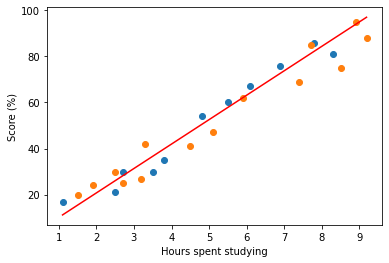

In [11]:
plt.scatter(X_train, y_train)
# plt.plot(X_train,y_pred_train, "r")
plt.plot(X_plot_train,y_pred_train, "r")

plt.scatter(X_test, y_test)

_ = plt.ylabel("Score (%)")
_ = plt.xlabel("Hours spent studying")

In [12]:
TestingData=pd.DataFrame(data=y_test, columns=["actual score"])
TestingData['LR predicted score']=y_pred_lin

TestingData

,actual score,LR predicted score
0,75.0,89.688170
1,85.0,81.202839
2,20.0,15.441526
3,24.0,19.684191
4,62.0,62.110845
5,25.0,28.169522
6,41.0,47.261516
7,95.0,93.930836
8,30.0,26.048189
9,42.0,34.533520


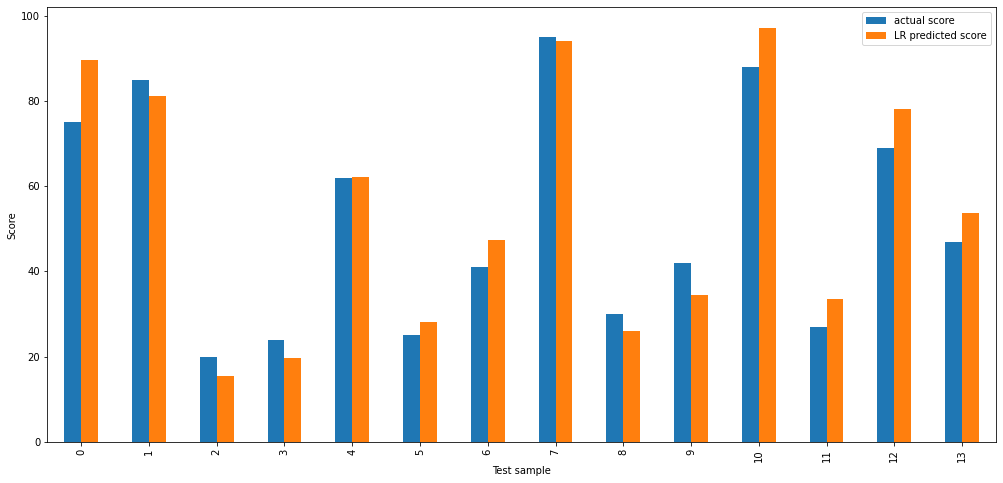

In [13]:
TestingData.plot.bar(figsize=(17, 8))
plt.ylabel("Score")
plt.xlabel("Test sample")
plt.show()

# 6. LASSO Regression

## 6.1. Re-assigning the samples

In [14]:
X = df["Hours"].values
y = df["Scores"].values

scalerX = StandardScaler()
scalerY = StandardScaler()

X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

X = scalerX.fit_transform(X)
y = scalerY.fit_transform(y)

X_train = X[train_indices]
y_train = y[train_indices]

X_test = X[test_indices]
y_test = y[test_indices]

## 6.2. GridSearch

#### How grid search works

In [15]:
pipeline = Pipeline([
    ('model', Lasso())
])

searchCV = GridSearchCV(pipeline,
                        {'model__alpha': np.arange(0.1, 40, 0.1)},
                        cv=5, scoring='r2', verbose=3 )

searchCV_results = searchCV.fit(X_train,y_train)

Fitting 5 folds for each of 399 candidates, totalling 1995 fits
[CV] model__alpha=0.1 ................................................
[CV] .................... model__alpha=0.1, score=0.885, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] .................... model__alpha=0.1, score=0.902, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] .................... model__alpha=0.1, score=0.946, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] .................... model__alpha=0.1, score=0.907, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] .................... model__alpha=0.1, score=0.738, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] .................... model__alpha=0.2, score=0.833, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... model__alpha=2.4000000000000004, score=-0.124, total=   0.0s
[CV] model__alpha=2.4000000000000004 .................................
[CV] ... model__alpha=2.4000000000000004, score=-11.194, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV] .... model__alpha=2.5000000000000004, score=-0.039, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV] .... model__alpha=2.5000000000000004, score=-5.346, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV] .... model__alpha=2.5000000000000004, score=-0.103, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV] .... model__alpha=2.5000000000000004, score=-0.124, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV] ... model__alpha=2.5000000000000004, score=-11.194, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] .

[CV] ................... model__alpha=4.9, score=-5.346, total=   0.0s
[CV] model__alpha=4.9 ................................................
[CV] ................... model__alpha=4.9, score=-0.103, total=   0.0s
[CV] model__alpha=4.9 ................................................
[CV] ................... model__alpha=4.9, score=-0.124, total=   0.0s
[CV] model__alpha=4.9 ................................................
[CV] .................. model__alpha=4.9, score=-11.194, total=   0.0s
[CV] model__alpha=5.0 ................................................
[CV] ................... model__alpha=5.0, score=-0.039, total=   0.0s
[CV] model__alpha=5.0 ................................................
[CV] ................... model__alpha=5.0, score=-5.346, total=   0.0s
[CV] model__alpha=5.0 ................................................
[CV] ................... model__alpha=5.0, score=-0.103, total=   0.0s
[CV] model__alpha=5.0 ................................................
[CV] .

[CV] ................... model__alpha=7.4, score=-0.124, total=   0.0s
[CV] model__alpha=7.4 ................................................
[CV] .................. model__alpha=7.4, score=-11.194, total=   0.0s
[CV] model__alpha=7.5 ................................................
[CV] ................... model__alpha=7.5, score=-0.039, total=   0.0s
[CV] model__alpha=7.5 ................................................
[CV] ................... model__alpha=7.5, score=-5.346, total=   0.0s
[CV] model__alpha=7.5 ................................................
[CV] ................... model__alpha=7.5, score=-0.103, total=   0.0s
[CV] model__alpha=7.5 ................................................
[CV] ................... model__alpha=7.5, score=-0.124, total=   0.0s
[CV] model__alpha=7.5 ................................................
[CV] .................. model__alpha=7.5, score=-11.194, total=   0.0s
[CV] model__alpha=7.6 ................................................
[CV] .

[CV] .................. model__alpha=10.0, score=-0.103, total=   0.0s
[CV] model__alpha=10.0 ...............................................
[CV] .................. model__alpha=10.0, score=-0.124, total=   0.0s
[CV] model__alpha=10.0 ...............................................
[CV] ................. model__alpha=10.0, score=-11.194, total=   0.0s
[CV] model__alpha=10.1 ...............................................
[CV] .................. model__alpha=10.1, score=-0.039, total=   0.0s
[CV] model__alpha=10.1 ...............................................
[CV] .................. model__alpha=10.1, score=-5.346, total=   0.0s
[CV] model__alpha=10.1 ...............................................
[CV] .................. model__alpha=10.1, score=-0.103, total=   0.0s
[CV] model__alpha=10.1 ...............................................
[CV] .................. model__alpha=10.1, score=-0.124, total=   0.0s
[CV] model__alpha=10.1 ...............................................
[CV] .

[CV] .................. model__alpha=12.6, score=-0.124, total=   0.0s
[CV] model__alpha=12.6 ...............................................
[CV] ................. model__alpha=12.6, score=-11.194, total=   0.0s
[CV] model__alpha=12.700000000000001 .................................
[CV] .... model__alpha=12.700000000000001, score=-0.039, total=   0.0s
[CV] model__alpha=12.700000000000001 .................................
[CV] .... model__alpha=12.700000000000001, score=-5.346, total=   0.0s
[CV] model__alpha=12.700000000000001 .................................
[CV] .... model__alpha=12.700000000000001, score=-0.103, total=   0.0s
[CV] model__alpha=12.700000000000001 .................................
[CV] .... model__alpha=12.700000000000001, score=-0.124, total=   0.0s
[CV] model__alpha=12.700000000000001 .................................
[CV] ... model__alpha=12.700000000000001, score=-11.194, total=   0.0s
[CV] model__alpha=12.8 ...............................................
[CV] .

[CV] .................. model__alpha=15.4, score=-0.124, total=   0.0s
[CV] model__alpha=15.4 ...............................................
[CV] ................. model__alpha=15.4, score=-11.194, total=   0.0s
[CV] model__alpha=15.5 ...............................................
[CV] .................. model__alpha=15.5, score=-0.039, total=   0.0s
[CV] model__alpha=15.5 ...............................................
[CV] .................. model__alpha=15.5, score=-5.346, total=   0.0s
[CV] model__alpha=15.5 ...............................................
[CV] .................. model__alpha=15.5, score=-0.103, total=   0.0s
[CV] model__alpha=15.5 ...............................................
[CV] .................. model__alpha=15.5, score=-0.124, total=   0.0s
[CV] model__alpha=15.5 ...............................................
[CV] ................. model__alpha=15.5, score=-11.194, total=   0.0s
[CV] model__alpha=15.6 ...............................................
[CV] .

[CV] model__alpha=18.000000000000004 .................................
[CV] .... model__alpha=18.000000000000004, score=-0.103, total=   0.0s
[CV] model__alpha=18.000000000000004 .................................
[CV] .... model__alpha=18.000000000000004, score=-0.124, total=   0.0s
[CV] model__alpha=18.000000000000004 .................................
[CV] ... model__alpha=18.000000000000004, score=-11.194, total=   0.0s
[CV] model__alpha=18.1 ...............................................
[CV] .................. model__alpha=18.1, score=-0.039, total=   0.0s
[CV] model__alpha=18.1 ...............................................
[CV] .................. model__alpha=18.1, score=-5.346, total=   0.0s
[CV] model__alpha=18.1 ...............................................
[CV] .................. model__alpha=18.1, score=-0.103, total=   0.0s
[CV] model__alpha=18.1 ...............................................
[CV] .................. model__alpha=18.1, score=-0.124, total=   0.0s
[CV] m

[CV] .................. model__alpha=20.6, score=-0.039, total=   0.0s
[CV] model__alpha=20.6 ...............................................
[CV] .................. model__alpha=20.6, score=-5.346, total=   0.0s
[CV] model__alpha=20.6 ...............................................
[CV] .................. model__alpha=20.6, score=-0.103, total=   0.0s
[CV] model__alpha=20.6 ...............................................
[CV] .................. model__alpha=20.6, score=-0.124, total=   0.0s
[CV] model__alpha=20.6 ...............................................
[CV] ................. model__alpha=20.6, score=-11.194, total=   0.0s
[CV] model__alpha=20.700000000000003 .................................
[CV] .... model__alpha=20.700000000000003, score=-0.039, total=   0.0s
[CV] model__alpha=20.700000000000003 .................................
[CV] .... model__alpha=20.700000000000003, score=-5.346, total=   0.0s
[CV] model__alpha=20.700000000000003 .................................
[CV] .

[CV] ................. model__alpha=23.1, score=-11.194, total=   0.0s
[CV] model__alpha=23.200000000000003 .................................
[CV] .... model__alpha=23.200000000000003, score=-0.039, total=   0.0s
[CV] model__alpha=23.200000000000003 .................................
[CV] .... model__alpha=23.200000000000003, score=-5.346, total=   0.0s
[CV] model__alpha=23.200000000000003 .................................
[CV] .... model__alpha=23.200000000000003, score=-0.103, total=   0.0s
[CV] model__alpha=23.200000000000003 .................................
[CV] .... model__alpha=23.200000000000003, score=-0.124, total=   0.0s
[CV] model__alpha=23.200000000000003 .................................
[CV] ... model__alpha=23.200000000000003, score=-11.194, total=   0.0s
[CV] model__alpha=23.300000000000004 .................................
[CV] .... model__alpha=23.300000000000004, score=-0.039, total=   0.0s
[CV] model__alpha=23.300000000000004 .................................
[CV] .

[CV] .................. model__alpha=25.6, score=-0.103, total=   0.0s
[CV] model__alpha=25.6 ...............................................
[CV] .................. model__alpha=25.6, score=-0.124, total=   0.0s
[CV] model__alpha=25.6 ...............................................
[CV] ................. model__alpha=25.6, score=-11.194, total=   0.0s
[CV] model__alpha=25.700000000000003 .................................
[CV] .... model__alpha=25.700000000000003, score=-0.039, total=   0.0s
[CV] model__alpha=25.700000000000003 .................................
[CV] .... model__alpha=25.700000000000003, score=-5.346, total=   0.0s
[CV] model__alpha=25.700000000000003 .................................
[CV] .... model__alpha=25.700000000000003, score=-0.103, total=   0.0s
[CV] model__alpha=25.700000000000003 .................................
[CV] .... model__alpha=25.700000000000003, score=-0.124, total=   0.0s
[CV] model__alpha=25.700000000000003 .................................
[CV] .

[CV] .... model__alpha=28.300000000000004, score=-5.346, total=   0.0s
[CV] model__alpha=28.300000000000004 .................................
[CV] .... model__alpha=28.300000000000004, score=-0.103, total=   0.0s
[CV] model__alpha=28.300000000000004 .................................
[CV] .... model__alpha=28.300000000000004, score=-0.124, total=   0.0s
[CV] model__alpha=28.300000000000004 .................................
[CV] ... model__alpha=28.300000000000004, score=-11.194, total=   0.0s
[CV] model__alpha=28.400000000000002 .................................
[CV] .... model__alpha=28.400000000000002, score=-0.039, total=   0.0s
[CV] model__alpha=28.400000000000002 .................................
[CV] .... model__alpha=28.400000000000002, score=-5.346, total=   0.0s
[CV] model__alpha=28.400000000000002 .................................
[CV] .... model__alpha=28.400000000000002, score=-0.103, total=   0.0s
[CV] model__alpha=28.400000000000002 .................................
[CV] .

[CV] model__alpha=30.800000000000004 .................................
[CV] ... model__alpha=30.800000000000004, score=-11.194, total=   0.0s
[CV] model__alpha=30.900000000000002 .................................
[CV] .... model__alpha=30.900000000000002, score=-0.039, total=   0.0s
[CV] model__alpha=30.900000000000002 .................................
[CV] .... model__alpha=30.900000000000002, score=-5.346, total=   0.0s
[CV] model__alpha=30.900000000000002 .................................
[CV] .... model__alpha=30.900000000000002, score=-0.103, total=   0.0s
[CV] model__alpha=30.900000000000002 .................................
[CV] .... model__alpha=30.900000000000002, score=-0.124, total=   0.0s
[CV] model__alpha=30.900000000000002 .................................
[CV] ... model__alpha=30.900000000000002, score=-11.194, total=   0.0s
[CV] model__alpha=31.000000000000004 .................................
[CV] .... model__alpha=31.000000000000004, score=-0.039, total=   0.0s
[CV] m

[CV] .... model__alpha=33.300000000000004, score=-0.103, total=   0.0s
[CV] model__alpha=33.300000000000004 .................................
[CV] .... model__alpha=33.300000000000004, score=-0.124, total=   0.0s
[CV] model__alpha=33.300000000000004 .................................
[CV] ... model__alpha=33.300000000000004, score=-11.194, total=   0.0s
[CV] model__alpha=33.400000000000006 .................................
[CV] .... model__alpha=33.400000000000006, score=-0.039, total=   0.0s
[CV] model__alpha=33.400000000000006 .................................
[CV] .... model__alpha=33.400000000000006, score=-5.346, total=   0.0s
[CV] model__alpha=33.400000000000006 .................................
[CV] .... model__alpha=33.400000000000006, score=-0.103, total=   0.0s
[CV] model__alpha=33.400000000000006 .................................
[CV] .... model__alpha=33.400000000000006, score=-0.124, total=   0.0s
[CV] model__alpha=33.400000000000006 .................................
[CV] .

[CV] .... model__alpha=35.800000000000004, score=-0.039, total=   0.0s
[CV] model__alpha=35.800000000000004 .................................
[CV] .... model__alpha=35.800000000000004, score=-5.346, total=   0.0s
[CV] model__alpha=35.800000000000004 .................................
[CV] .... model__alpha=35.800000000000004, score=-0.103, total=   0.0s
[CV] model__alpha=35.800000000000004 .................................
[CV] .... model__alpha=35.800000000000004, score=-0.124, total=   0.0s
[CV] model__alpha=35.800000000000004 .................................
[CV] ... model__alpha=35.800000000000004, score=-11.194, total=   0.0s
[CV] model__alpha=35.900000000000006 .................................
[CV] .... model__alpha=35.900000000000006, score=-0.039, total=   0.0s
[CV] model__alpha=35.900000000000006 .................................
[CV] .... model__alpha=35.900000000000006, score=-5.346, total=   0.0s
[CV] model__alpha=35.900000000000006 .................................
[CV] .

[CV] ... model__alpha=38.300000000000004, score=-11.194, total=   0.0s
[CV] model__alpha=38.400000000000006 .................................
[CV] .... model__alpha=38.400000000000006, score=-0.039, total=   0.0s
[CV] model__alpha=38.400000000000006 .................................
[CV] .... model__alpha=38.400000000000006, score=-5.346, total=   0.0s
[CV] model__alpha=38.400000000000006 .................................
[CV] .... model__alpha=38.400000000000006, score=-0.103, total=   0.0s
[CV] model__alpha=38.400000000000006 .................................
[CV] .... model__alpha=38.400000000000006, score=-0.124, total=   0.0s
[CV] model__alpha=38.400000000000006 .................................
[CV] ... model__alpha=38.400000000000006, score=-11.194, total=   0.0s
[CV] model__alpha=38.50000000000001 ..................................
[CV] ..... model__alpha=38.50000000000001, score=-0.039, total=   0.0s
[CV] model__alpha=38.50000000000001 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 1995 out of 1995 | elapsed:    2.8s finished


In [16]:
print("alpha: ", searchCV_results.best_params_["model__alpha"])
print("Best CV score: ", searchCV_results.best_score_)

alpha:  0.1
Best CV score:  0.8757126642136097


#### Taking off the CV search evolution

In [17]:
searchCV_result_lasso = {}
iter_idx = 1

In [18]:
pipeline = Pipeline([
    ('model', Lasso())
])

searchCV = GridSearchCV(pipeline,
                        {'model__alpha': np.arange(0.01,0.1,0.0001)}, # 0.01,0.2,0.01
                        cv=5, scoring='r2')

searchCV_results = searchCV.fit(X_train,y_train)

searchCV_result_lasso[str(iter_idx)] = {
    "alpha": searchCV_results.best_params_["model__alpha"],
    "Best CV score": searchCV_results.best_score_
}

iter_idx+=1

for key in searchCV_result_lasso:
  print("iteration ", key, " : ",  searchCV_result_lasso[key])

iteration  1  :  {'alpha': 0.09309999999999949, 'Best CV score': 0.8761556920574222}


## 6.3. Training, testing and evaluating the LASSO model

In [19]:
lasso_alpha = searchCV.best_params_['model__alpha']

lasso_reg = Lasso(alpha = lasso_alpha)
lasso_reg.fit(X_train,y_train)

y_pred_lasso = lasso_reg.predict(X_test)

MSE_lasso = mean_squared_error(y_test,y_pred_lasso)
MAE_lasso = mean_absolute_error(y_test,y_pred_lasso)
R2_lasso = r2_score(y_test,y_pred_lasso)

evalmetrics["LASSO"] = [MSE_lasso ,MAE_lasso ,R2_lasso]

evalmetrics

,LR,LASSO
MSE,0.074652,0.054392
MAE,0.232428,0.201915
R²,0.929061,0.948314


## 6.4. Comparing Least squares and LASSO models performances

In [20]:
y_pred_lasso = scalerY.inverse_transform(y_pred_lasso.reshape(-1,1))
TestingData['LASSO predicted score']=y_pred_lasso
TestingData

,actual score,LR predicted score,LASSO predicted score
0,75.0,89.688170,85.401419
1,85.0,81.202839,77.847530
2,20.0,15.441526,19.304894
3,24.0,19.684191,23.081838
4,62.0,62.110845,60.851281
5,25.0,28.169522,30.635727
6,41.0,47.261516,47.631976
7,95.0,93.930836,89.178363
8,30.0,26.048189,28.747255
9,42.0,34.533520,36.301143


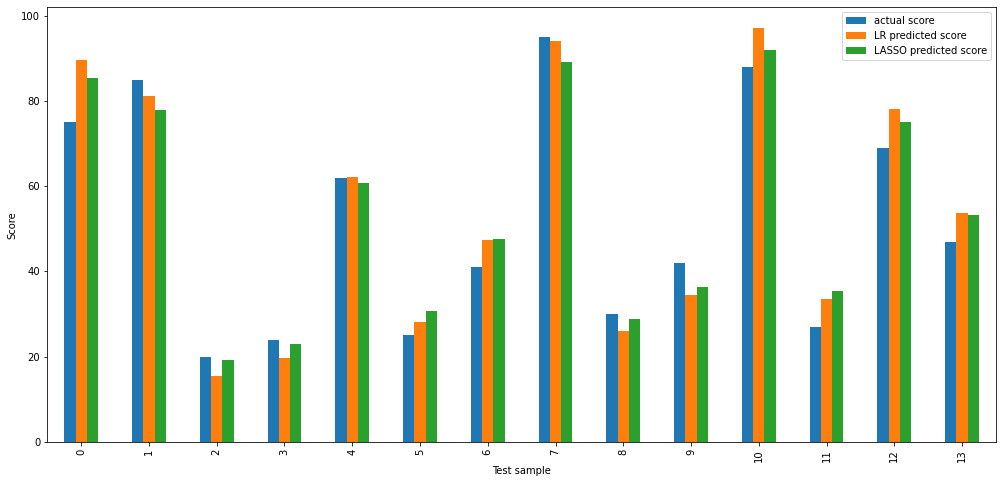

In [21]:
TestingData.plot.bar(figsize=(17, 8))
plt.ylabel("Score")
plt.xlabel("Test sample")
plt.show()

In [22]:
y_test = scalerY.inverse_transform(y_test)

In [23]:
comparison = []
for i in range(len(y_test)):
  if np.abs(y_test[i] - y_pred_lin[i]) > np.abs(y_test[i] - y_pred_lasso[i]):
    comparison.append('LASSO is better')
  else:
    comparison.append("LR is better")

In [24]:
TestingData["comparison"]=comparison
TestingData

,actual score,LR predicted score,LASSO predicted score,comparison
0,75.0,89.688170,85.401419,LASSO is better
1,85.0,81.202839,77.847530,LR is better
2,20.0,15.441526,19.304894,LASSO is better
3,24.0,19.684191,23.081838,LASSO is better
4,62.0,62.110845,60.851281,LR is better
5,25.0,28.169522,30.635727,LR is better
6,41.0,47.261516,47.631976,LR is better
7,95.0,93.930836,89.178363,LR is better
8,30.0,26.048189,28.747255,LASSO is better
9,42.0,34.533520,36.301143,LASSO is better


In [25]:
print(TestingData["comparison"].value_counts())

LASSO is better    8
LR is better       6
Name: comparison, dtype: int64


# 7. Ridge Regression

## 7.1. Re-assigning the samples

In [26]:
X = df["Hours"].values
y = df["Scores"].values

scalerX = StandardScaler()
scalerY = StandardScaler()

X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

X = scalerX.fit_transform(X)
y = scalerY.fit_transform(y)

X_train = X[train_indices]
y_train = y[train_indices]

X_test = X[test_indices]
y_test = y[test_indices]

# Split the dataset into training and test sets with test size = 55% and randomization of samples = 70%
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=70)


## 7.2. GridSearch

In [27]:
pipeline = Pipeline([
    ('model', Ridge())
])

searchCV = GridSearchCV(pipeline,
                        {'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}, #np.arange(0.1, 40, 0.1)},
                        cv=5)#, scoring='r2', verbose=3 )

searchCV_results = searchCV.fit(X_train,y_train)

In [28]:
print("alpha: ", searchCV_results.best_params_["model__alpha"])
print("Best CV score: ", searchCV_results.best_score_)

alpha:  1
Best CV score:  0.8756539000599004


#### Taking off the CV search evolution

In [29]:
searchCV_results_ridge = {}
iter_idx = 1

In [30]:
pipeline = Pipeline([
    ('model', Ridge())
])

searchCV = GridSearchCV(pipeline,
                        {'model__alpha': np.arange(0.1,1,0.01)}, 
                        cv=3)

searchCV_results = searchCV.fit(X_train,y_train)

searchCV_results_ridge[str(iter_idx)] = {
    "alpha": searchCV_results.best_params_["model__alpha"],
    "Best CV score": searchCV_results.best_score_
}

iter_idx+=1

for key in searchCV_results_ridge:
  print("iteration ", key, " : ",  searchCV_results_ridge[key])

iteration  1  :  {'alpha': 0.3599999999999999, 'Best CV score': 0.9443537691313068}


## 7.3. Training, testing and evaluating the Ridge model

In [31]:
ridge_alpha = searchCV.best_params_['model__alpha']

ridge_reg = Ridge(alpha = ridge_alpha)
ridge_reg.fit(X_train,y_train)

y_pred_ridge = ridge_reg.predict(X_test)

MSE_ridge = mean_squared_error(y_test,y_pred_ridge)
MAE_ridge = mean_absolute_error(y_test,y_pred_ridge)
R2_ridge = r2_score(y_test,y_pred_ridge)

evalmetrics["RIDGE"] = [MSE_ridge ,MAE_ridge ,R2_ridge]

evalmetrics

,LR,LASSO,RIDGE
MSE,0.074652,0.054392,0.063779
MAE,0.232428,0.201915,0.221103
R²,0.929061,0.948314,0.939393


## 7.4. Comparing Least squares, LASSO and Ridge models performances

In [32]:
y_pred_ridge = scalerY.inverse_transform(y_pred_ridge.reshape(-1,1))
TestingData['RIDGE predicted score']=y_pred_ridge
# TestingData= TestingData.drop("comparison RIDGE",1)
TestingData

,actual score,LR predicted score,LASSO predicted score,comparison,RIDGE predicted score
0,75.0,89.688170,85.401419,LASSO is better,88.154780
1,85.0,81.202839,77.847530,LR is better,80.002630
2,20.0,15.441526,19.304894,LASSO is better,16.823470
3,24.0,19.684191,23.081838,LASSO is better,20.899545
4,62.0,62.110845,60.851281,LR is better,61.660293
5,25.0,28.169522,30.635727,LR is better,29.051695
6,41.0,47.261516,47.631976,LR is better,47.394031
7,95.0,93.930836,89.178363,LR is better,92.230855
8,30.0,26.048189,28.747255,LASSO is better,27.013657
9,42.0,34.533520,36.301143,LASSO is better,35.165807


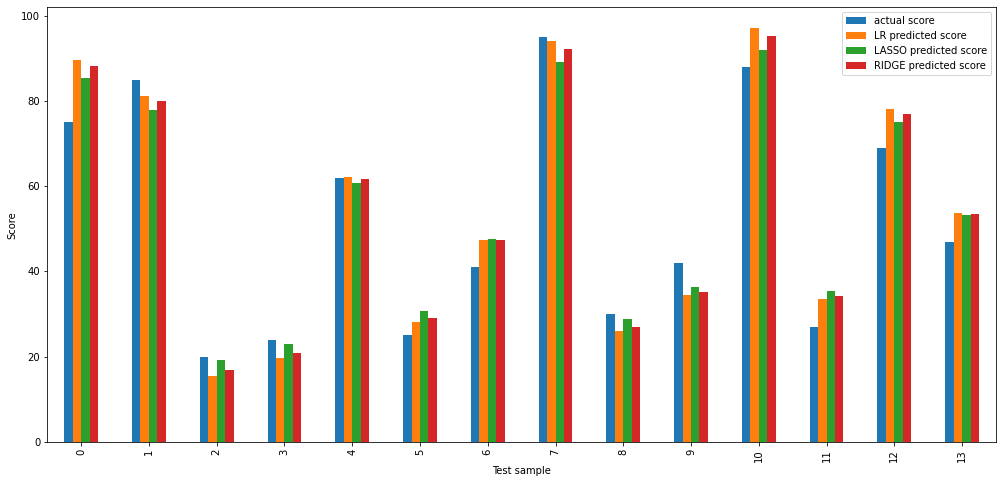

In [33]:
TestingData.plot.bar(figsize=(17, 8))
plt.ylabel("Score")
plt.xlabel("Test sample")
plt.show()

In [34]:
y_test = scalerY.inverse_transform(y_test)

In [35]:
# comparison = []
# for i in range(len(y_test)):
#   if np.abs(y_test[i] - y_pred_lin[i]) > np.abs(y_test[i] - y_pred_lasso[i]):
#     comparison.append('LASSO is better')
#   else:
#     comparison.append("LR is better")
    
# TestingData["comparison"]=comparison
# TestingData

comparison = []
for i in range(len(y_test)):
  if np.abs(y_test[i] - y_pred_lin[i]) > np.abs(y_test[i] - y_pred_ridge[i]):
    comparison.append('RIDGE is better')
  else:
    comparison.append("LR is better")

TestingData["comparison RIDGE"]=comparison
# TestingData

comparison = []
for i in range(len(y_test)):
    if np.abs(y_test[i]-y_pred_lasso[i]) > np.abs(y_test[i]- y_pred_ridge[i]):
        comparison.append("RIDGE")
    else:
        comparison.append("LASSO")    

TestingData["comparison RIDGE / LASSO"]=comparison
TestingData

,actual score,LR predicted score,LASSO predicted score,comparison,RIDGE predicted score,comparison RIDGE,comparison RIDGE / LASSO
0,75.0,89.688170,85.401419,LASSO is better,88.154780,RIDGE is better,LASSO
1,85.0,81.202839,77.847530,LR is better,80.002630,LR is better,RIDGE
2,20.0,15.441526,19.304894,LASSO is better,16.823470,RIDGE is better,LASSO
3,24.0,19.684191,23.081838,LASSO is better,20.899545,RIDGE is better,LASSO
4,62.0,62.110845,60.851281,LR is better,61.660293,LR is better,RIDGE
5,25.0,28.169522,30.635727,LR is better,29.051695,LR is better,RIDGE
6,41.0,47.261516,47.631976,LR is better,47.394031,LR is better,RIDGE
7,95.0,93.930836,89.178363,LR is better,92.230855,LR is better,RIDGE
8,30.0,26.048189,28.747255,LASSO is better,27.013657,RIDGE is better,LASSO
9,42.0,34.533520,36.301143,LASSO is better,35.165807,RIDGE is better,LASSO


In [36]:
print(TestingData["comparison"].value_counts())
print(TestingData["comparison RIDGE"].value_counts())
print(TestingData["comparison RIDGE / LASSO"].value_counts())

LASSO is better    8
LR is better       6
Name: comparison, dtype: int64
RIDGE is better    8
LR is better       6
Name: comparison RIDGE, dtype: int64
LASSO    8
RIDGE    6
Name: comparison RIDGE / LASSO, dtype: int64
